### Notes
> g is reasonably insensitive to $\eta$ when $\eta\simeq\langle\Delta E\rangle$
- [Paper](./pdfs/0705.1607.pdf) in question
- Simple eigenvectors of momentum space hamiltonian would not cut it (it is only the spin vectors), $|n\rangle$ includes a tensor product with another vector, sir is unsure which.
- [Reference on Thouless energy](./pdfs/PhysRevLett.98.076602.pdf) on the same Kubo formula, similar hamilitonian
- [Text](./pdfs/Yoseph_Imry-Introduction_to_mesoscopic_physics-Oxford_University_Press.pdf) within reference
    - [Eqn 5.2](./pdfs/Yoseph_Imry-Introduction_to_mesoscopic_physics-Oxford_University_Press.pdf#page=101) (last text on previous page)
    - What is $\Omega$?
- [Reference](./pdfs/thouless1981.pdf#page=4) within reference
- Real space is periodic, momentum is infinite with cut off of circle with radius $\Lambda$
- Figure out number of points inside circle (cf. notes after copy of paper in tablet)
- Look up renormalization
- Read [Pauli Equation](https://en.wikipedia.org/wiki/Pauli_equation)
- Move to mathematica immediately
- [Complex conductivity](http://qtp.ufl.edu/ofdft/research/KGECpaper.v6b.pdf)?
- [Kubo wiki](https://en.wikipedia.org/wiki/Kubo_formula)

### Target plots

![g vs L](.\targets\g_vs_L.png) ![$\beta$ vs g](.\targets\beta_vs_g.png)

### Plot next 

Plot in figure 1c in [Thouless reference](./pdfs/PhysRevLett.98.076602.pdf#page=2): $g$ vs. $\eta/\delta E$

$\delta E = 1/L^2\rho_F$

Where $\rho_F$ is the density of states at the Fermi level.

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import math

- g vs η in 547.6213 seconds
- g vs L in 543.1387 seconds

with parallelisation
- g vs η in 33.3108 seconds
- g vs L in 35.3282 seconds

k-space size 2000 with paralellisation:
- g vs η in 573.7498 seconds
- g vs L in 631.5431 seconds

In [2]:
num = 1

while os.path.isfile(f'./output data/g_vs_eta_L{num}.npz'):
    num += 1

print(f'./output data/g_vs_eta_L{num-1}.npz')

./output data/g_vs_eta_L9.npz


In [3]:
with open(f'./output data/g_vs_eta_L{num-1}.npz', 'rb') as file:
    arrs = dict(np.load(file))

In [4]:
# plt.plot(arrs['eta'], arrs['g_vs_eta'],'.',label='true') # almost straight line with semilogy
# plt.legend()
# plt.xlabel('$\eta$')
# plt.title('g vs $\eta$')
# plt.ylabel('g')
# plt.savefig('.\\graphics\\g_vs_η.png')

### Sympy Approach

Analytical

In [5]:
from sympy import *

In [6]:
def fermi_dirac(E, Ef=0, T=0):
    k_B = 1
    if T==0:
        if E > Ef:
            return 0
        elif E == Ef:
            return .5
        elif E < Ef:
            return 1
    return 1/(1+exp((E-Ef)/k_B/T))

If n and n' are over different points in k-space.

In [7]:
kx, ky, v_F, kx_, ky_, T = symbols("k_x k_y v_F k^'_x k^'_y T", real=True)
sx = Matrix([[0,1],[1,0]])
h_cut = 1

In [8]:
H = Matrix([[0,kx-I*ky],[kx+I*ky,0]])*v_F
H_ = Matrix([[0,kx_-I*ky_],[kx_+I*ky_,0]])*v_F
n = H.eigenvects()
En = [i[0] for i in n]
n = [Matrix(i[2][0]) for i in n]
n_ = H_.eigenvects()
En_ = [i[0] for i in n_]
n_ = [Matrix(i[2][0]) for i in n_]
reqd = []

In [9]:
for i, j in zip([0,1,0,1],[0,0,1,1]):
    reqd.append( [ (n[i].T.conjugate()*sx*n_[j]) * (n_[j].T.conjugate()*sx*n[i]) , En[i]-En_[j] ] )

If they're eigenvectors of the same point.

In [10]:
H = Matrix([[0,kx-I*ky],[kx+I*ky,0]])*v_F
n = H.eigenvects()
En = [i[0] for i in n]
n = [Matrix(i[2][0]) for i in n]
n_ = H.eigenvects()
En_ = [i[0] for i in n_]
n_ = [Matrix(i[2][0]) for i in n_]
solutions = []

for i, j in zip([0,1,0,1],[0,0,1,1]):
    if En[i]!=En[j]:
        solutions.append(simplify((fermi_dirac(En[i],T=T)-fermi_dirac(En[j],T=T))/(En[i]-En_[j]) * (n[i].T.conjugate()*sx*n_[j]) * (n_[j].T.conjugate()*sx*n[i])))
        # solutions.append()

solution = solutions[0]
solution = solution.subs({v_F:1, T:1e7*1*2*np.pi})
# from scipy import lambdify
Lambda = lambda L: 20*2*np.pi/L
lamda = Lambda(1000)
k_space_size = 200
k = np.linspace(-lamda, lamda, k_space_size)
kxx, kyy = np.meshgrid(k,k)

solution

Matrix([[-2*k_y**2*sqrt(k_x**2 + k_y**2)*tanh(7.95774715459477e-9*sqrt(k_x**2 + k_y**2))/((k_x - I*k_y)**2*(k_x + I*k_y)**2)]])

In [11]:
from sympy.utilities.lambdify import lambdastr

g_part = lambdastr((kx,ky),solution[0])
print(g_part)
g = lambda k_x, k_y, L:-2*1j*np.pi*h_cut**2/L**2*eval(g_part)(k_x,k_y)

g(1,1,10)

lambda k_x,k_y: (-2*k_y**2*sqrt(k_x**2 + k_y**2)*math.tanh(7.95774715459477e-9*sqrt(k_x**2 + k_y**2))/((k_x - 1j*k_y)**2*(k_x + 1j*k_y)**2))


3.53553390593274e-10*sqrt(2)*I

### Shivay file transfer functions

In [12]:
def bring_in():
    num = 1

    while os.path.isfile(f'./output data/shivay output/g_vs_eta_L{num}.npz'):
        num += 1

    print(f'./output data/shivay output/g_vs_eta_L{num}.npz')

    print('go to the jupyter server terminal window')

    os.system(f'scp -P 4422 -r fizaank.phy21.iitbhu@paramshivay.iitbhu.ac.in:/home/fizaank.phy21.iitbhu/massless_fermion/output_data/g_vs_eta_L{num}.npz "./output data/shivay output/"')

def send_out():
    print('go to the jupyter server terminal window')
    os.system(f'scp -P 4422 -r g_vs_eta_L_new.py fizaank.phy21.iitbhu@paramshivay.iitbhu.ac.in:/home/fizaank.phy21.iitbhu/massless_fermion')

#### Transfers

In [13]:
# bring_in()

In [14]:
# send_out()

### Plots

In [15]:
num = 1

while os.path.isfile(f'./output data/shivay output/g_vs_eta_L{num}.npz'):
    num += 1

with open(f'./output data/shivay output/g_vs_eta_L{num-1}.npz', 'rb') as file:
    print(f'./output data/shivay output/g_vs_eta_L{num-1}.npz')
    arrs = dict(np.load(file))

L = arrs['L']
g = arrs['g_vs_L']

./output data/shivay output/g_vs_eta_L7.npz


C:\Users\freak\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


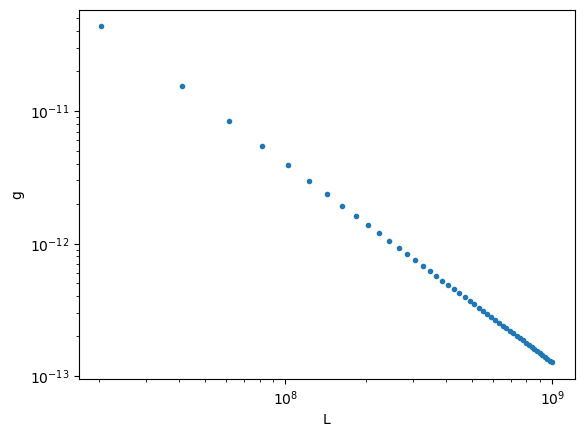

In [16]:
plt.loglog(L[1:],g[1:],'.')
plt.xlabel('L')
plt.ylabel('g')
plt.show()

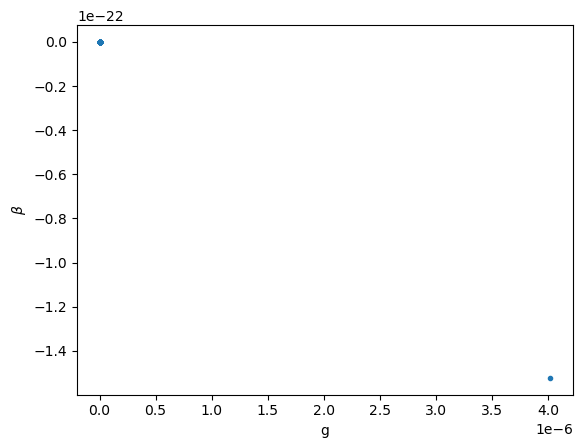

In [17]:
cs = CubicSpline(L,g)
b = cs(L, 1)
plt.plot(g, g/L*b,'.')
plt.xlabel('g')
plt.ylabel('$\\beta$')
plt.show()

In [18]:
eta = arrs['eta']
g = arrs['g_vs_eta']

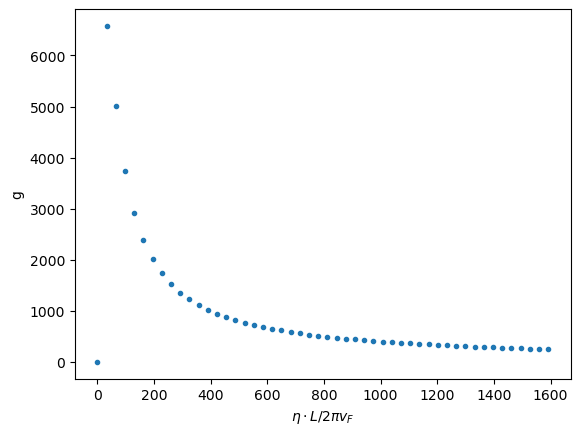

In [19]:
plt.plot(eta/(2*np.pi),g,'.')
plt.xlabel('$\eta\cdot L/2\pi v_F$')
plt.ylabel('g')
plt.show()